In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

>> # **Statistic for AI and Data Science**
>>>>> # **Coursework 1**

## Introduction
This project attempts to introduce the reader with some general travel patterns of the London Underground Stations <br>
by *considering passenger exits for all stations during service hours*. The analysis uses the 'hourlyExits.csv' file<br>
generated by Tfl and identifies two 'peak times' of regular weekdays (in the morning, consisting of Hour07, Hour08, Hour09<br>
and in the evening, consisting of Hour16, Hour17, Hour18). This bi-modal exit distribution is first visualised and further<br>
analysed, then used as means to classify stations, according to whether they are 'work-related', 'residential' or 'other'<br>
areas. The coursework provides some rudimental justification for the cut-off thresholds (mainly based on plotting the distributions<br>
and descriptive statistics). The developed ideas and expectations about stations are then tested on a set of Northern Line Stations.<br>

### Content

 1. **Section 1: Creating a relevant dataframe with selected variables**
      1. Finding AM & PM hour exit counts for each station
      1. Calculating AM & PM proportions
      1. Describing the newly created dataframe and respective attributes
      
 2. **Section 2: Plotting and Analysing Distributions**
      1. Histogram of AM_proportion and Descriptive Statistics
      1. Histogram of PM_proportion and Descriptive Statistics
      1. Assumptions about stations
      
 3. **Section 3: A Simple Classification of Stations**
      1. Categories for classifying stations 
      1. Justifying the thresholds for categories
      1. Reporting classification on a set of Northern Line stations


In [2]:
# Loading the data
my_data = pd.read_csv('hourlyExits.csv', index_col='Station')

# Printing the first few lines of dataframe
my_data.head()


,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6


### **Section 1: Creating a relevant dataframe with selected variables**

As a first task, all exits in respective morning and evening peak hours for each station are summed up and displayed<br>
in seperate columns of a table. Second, AM and PM proportions are calculated for all stations by dividing the two peak <br>
periods of all by total exits at each station. The table and a short description of variables are provided below afterwards.<br>

#### Section 1.A. Finding AM & PM hour exit counts for each station

In [3]:
# First, seperate AM and PM peak counts for each station

exits_am = my_data.pivot_table(values=['H07','H08','H09'], index=['Station'], aggfunc='sum')
exits_pm = my_data.pivot_table(values=['H16','H17','H18'], index=['Station'], aggfunc='sum')


am_totals= pd.DataFrame().assign(Total_AM_Peak = exits_am.apply(sum, axis=1))
pm_totals=pd.DataFrame().assign(Total_PM_Peak = exits_pm.apply(sum, axis=1))

In [4]:
# Now, we need the total exits for all stations (including all hours)
total_allhours = pd.DataFrame().assign(Total_ALL = my_data.apply(sum, axis=1))
total_allhours

,Total_ALL
Station,
Acton Town,9362
Aldgate,16136
Aldgate East,21206
Alperton,5118
Amersham,3905
...,...
Wimbledon Park,3296
Wood Green,18989
Wood Lane,6610


In [5]:
# Next, we create a data frame with the existing columns
peak_counts = am_totals.assign(Total_PM_Peak = pm_totals, Total_Exits = total_allhours)
peak_counts

,Total_AM_Peak,Total_PM_Peak,Total_Exits
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


#### Section 1.B. Calculating AM & PM proportions

In [6]:
# Next, we calculate proportions for each station: divide peaks with Total_Passenger
def calc_prop_am(data):
    for row in data:
        total = data.loc['Total_AM_Peak'] / data.loc['Total_Exits']
        return total

def calc_prop_pm(data):
    for row in data:
        total = data.loc['Total_PM_Peak'] / data.loc['Total_Exits']
        return total
        
peak_counts = peak_counts.assign(AM_proportion = peak_counts.apply(calc_prop_am, axis=1),
                              PM_proportion = peak_counts.apply(calc_prop_pm, axis=1))

peak_counts = peak_counts.drop(columns='Total_Exits')

#### Section 1.C. Describing the newly created dataframe and its variables

The below table lists **269 London Underground Stations** with the *following columns*:
* **Total_AM_Peak:** it is the summation of passenger exits at each station that happens in the hours <br>
  07am, 08am, and 09am - as the representation of the morning 'peak hours' during which stations may see a <br>
  considerably bigger proportion of their total daily exits than during other hours. 
  
* **Total_PM_Peak:** it is the summation of passenger exits at each station that happens in the hours <br>
  16pm, 17pm, and 18pm - as the representation of the evening 'peak hours' during which stations may see a <br>
  considerably bigger proportion of their total daily exits than during other hours. 
  
* **AM_proportion:** this column shows the proportion of morning peak exits in proportion to total exits of the day <br>
  for each station. It is calculated by: Total_AM_Peak / Total_Exits (for each station)
  
* **PM_proportion:** this column shows the proportion of evening peak exits in proportion to total exits of the day <br>
  for each station. It is calculated by: Total_PM_Peak / Total_Exits (for each station) 
  
* **Station:** lists all stations considered in the analysis

In [7]:
# Print the newly created dataframe
peak_counts

,Total_AM_Peak,Total_PM_Peak,AM_proportion,PM_proportion
Station,,,,
Acton Town,1970,2628,0.210425,0.280709
Aldgate,7408,2992,0.459098,0.185424
Aldgate East,7618,3803,0.359238,0.179336
Alperton,856,1847,0.167253,0.360883
Amersham,424,1465,0.108579,0.375160
...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985
Wood Green,2165,6494,0.114013,0.341987
Wood Lane,1798,1766,0.272012,0.267171


### **Section 2: Plotting and Analysing Distributions**

To understand more of the travel patterns that happening here, some descriptive statistics and plots of the distributions are generated below.

#### Section 2.A. Histogram of AM_proportion and Statistics

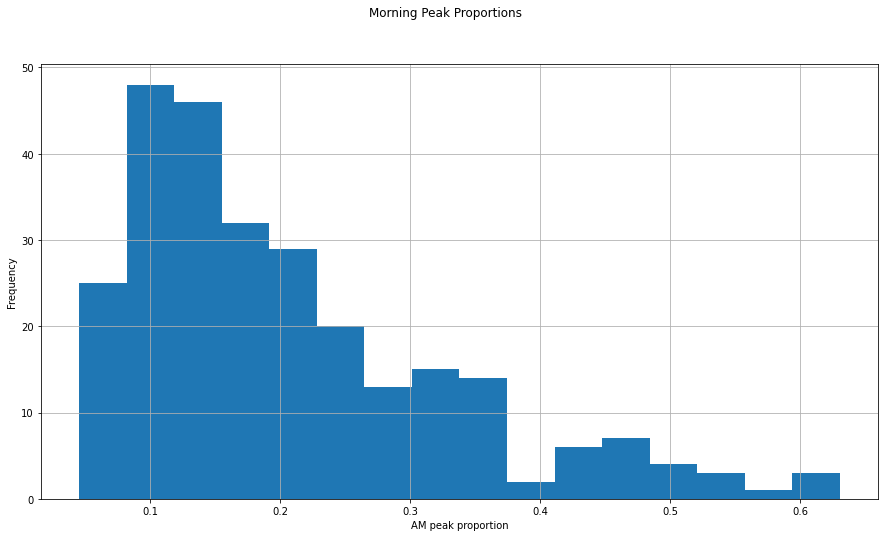

In [8]:
peak_counts.AM_proportion.plot(kind='hist', figsize=(15,8), bins=16)
plt.xlabel("AM peak proportion")
plt.ylabel("Frequency")
plt.suptitle("Morning Peak Proportions")
plt.grid()
plt.show()

After plotting the AM_proportion, it is clear that AM_proportion is **right skewed**. 

In [9]:
# Generating descriptive statistics
descriptive_stats = peak_counts.describe()
descriptive_stats

,Total_AM_Peak,Total_PM_Peak,AM_proportion,PM_proportion
count,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750
std,8181.784059,6276.463316,0.122161,0.087724
min,27.000000,239.000000,0.045302,0.084630
25%,677.500000,1471.750000,0.116120,0.240947
50%,1517.000000,2622.000000,0.169378,0.307397
75%,4315.250000,4707.750000,0.266443,0.361596
max,61116.000000,59486.000000,0.630427,0.496079


After acquiring the main descriptive statistics of AM_proportion, the numbers validate this: the mean (=0.2071) is greater than the median (=0.1693). <br>


The minimum and median value suggests that most stations’ AM_proportion falls into a lower proportion bin (0.045 to 0.169; located on the<br>
left hand side of the distribution), meaning they are relatively quiet in the morning. On the contrary, a relatively small number of stations<br>
experience extremely busy peak hours (with proportion bins ranging from approximately 0.3 roughly 0.7; located on the right hand side of the distribution).<br>

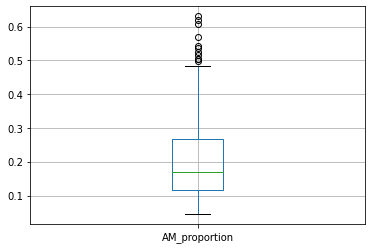

In [10]:
boxplot = peak_counts.boxplot(column=['AM_proportion'])

Using a boxplot of AM_proportion to visualise the basic statistics (and confirm the abovementioned trends we previously generated,<br>
it can be seen that the first two quartile (median), that is, 50% of the stations have an AM_proportion less than 0.16; a long whisker<br>
on the upper side of the boxplot due to the many outliers.

#### Section 2.B. Histogram of PM_proportion and Statistics

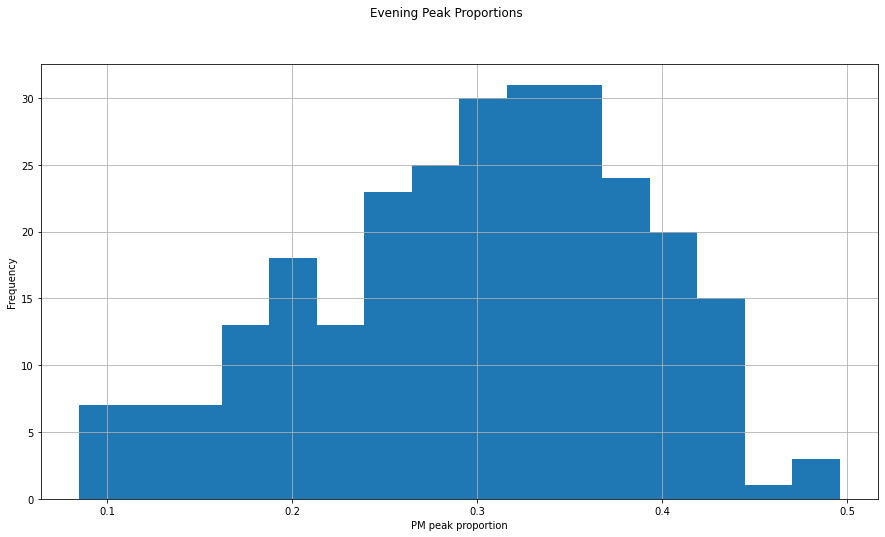

In [11]:
peak_counts.PM_proportion.plot(kind='hist', figsize=(15,8), bins=16)
plt.xlabel("PM peak proportion")
plt.ylabel("Frequency")
plt.suptitle("Evening Peak Proportions")
plt.grid()
plt.show()

Contrary to AM_proportion, PM_proportion is slightly **left skewed**, that is, the left tail is longer;<br> 
the mass of the distribution is concentrated on the middle-right of the figure (mean=0.2987 < median=0.3073). <br>
A big chunk of all stations fall into a bin range of 0.2 to 0.45. That is, a lot of stations are relatively busy during these<br>
evening hours as people getting off at these stations after work, returning home. <br>

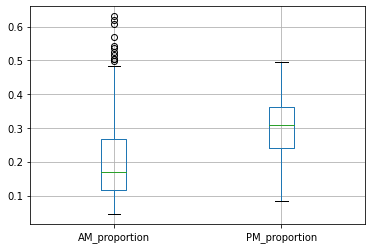

In [12]:
boxplot2 = peak_counts.boxplot(column=['AM_proportion','PM_proportion'])

Comparing the boxplot of PM_proportion to AM_proportion, a higher median value (0.30) can be seen with a more compressed interquartile range than that<br>
of AM_proportion, meaning that there is less variability around the median for the middle part of the data (more evenly spread out,<br>
not many stations with extraordinarily large exit numbers). The range of the AM and PM proportions also vary, being significantly smaller for the latter <br>
(AM_range=0.58 > PM_range=0.41), which is not surprising in light of what we have just said.

#### Section 2.C. Assumptions about stations

Considering these trends, stations with large exit numbers in the morning are probably near work-related areas, where many people<br>
get off in the morning for work. Stations with many exits in the evening are probably residential areas where people return after work. <br>

### Section 3: A Simple Classification of Stations

#### Section 3.A. Categories for classifying stations
The reason for classifying stations into work/residential/other categories can be derived from Section 1 and 2's analysis.<br>
That is, the data clearly has a bi-modal distribution with morning and evening peak hours (such hours already boundled<br>
together in Section 1). Stations that are way busier in the mornings should logically be located in commercial areas with many jobs,<br>
whereas stations that see a higher proportion of their daily exits happening in the evening peak hours when workers return home could<br>
be labelled as residential areas. As a reasonable assumption, there are stations that will see a roughly equal proportion between <br>
their morning and evening peak hours: for example, touristic places, shopping areas, or areas with roughly equal commercial to<br>
residential activity. <br>


#### Section 3.B. Justifying the thresholds of categories
Before detailing the chosen thresholds for each category, it is worth mentioning that thresholds are calculated <br>
using peak proportions rather than peak counts, as to levelling out station size differences. 


* **Work:** have (significantly) 'more' exits in the AM peak than in the PM peak. It seems logical to select those<br>
  stations that have a higher AM_proportion than the 75% Quartile (=0.26) and those that have a lower PM_proportion <br>
  than the 25% Quartile (=0.24). However, the former was rounded up to 0.3 (due to skewed distribution; more on this under <br>
  'Residential' category') and round down the latter to 0.2 (more on this under 'Residential' category.) <br>
  
  
* **Residential:** have (significantly) 'more' exits in the PM peak than in the AM peak. Kind of an inverse approach of <br>
  the 'Work' category: stations are selected that have AM_proportions below the 50% Quartile (~18) because of the skewed distribution of <br>
  the AM peak proportion. Most stations on the left side of the distribution see very similar amount of passengers exiting,<br> 
  hence the leaway for this threshold to include more of them. Second, for similar reasons, rather than taking <br>
  the 75% Quartile (=0.36) for PM_proportion, the threshold is lowered to 0.26 as the distribution has relatively small variability around<br>
  its median as observed in Section 2. <br>
  
 
* **Other:** the number exits in the AM and PM peaks are approximately equal. All stations that are not included in  <br>
  'Work' or 'Residential' will fall in this category. <br>

In [28]:
# A function classifying stations
def StationCategory(row):
    if ((row.AM_proportion >= 0.3) & (row.PM_proportion <= 0.2)):
        return 'Work'
    if ((row.AM_proportion <= 0.18) & (row.PM_proportion >= 0.26)):
        return 'Residential'
    else:
        return 'Other'
    
peak_counts_final = peak_counts.assign(Classification = peak_counts.apply(StationCategory, axis=1))
peak_counts_final

,Total_AM_Peak,Total_PM_Peak,AM_proportion,PM_proportion,Classification
Station,,,,,
Acton Town,1970,2628,0.210425,0.280709,Other
Aldgate,7408,2992,0.459098,0.185424,Work
Aldgate East,7618,3803,0.359238,0.179336,Work
Alperton,856,1847,0.167253,0.360883,Residential
Amersham,424,1465,0.108579,0.375160,Residential
...,...,...,...,...,...
Wimbledon Park,497,1114,0.150789,0.337985,Residential
Wood Green,2165,6494,0.114013,0.341987,Residential
Wood Lane,1798,1766,0.272012,0.267171,Other


#### Section 3.C. Reporting classification on a set of Northern Line stations
Generally, the busiest 'Work-related' stations are located in the centre of London (Zone 1), most 'Residential' areas<br>
outside the first zone, and stations categorised as 'Other' could be anywhere, really. The below listed stations are <br>
on the Northern Line - the ends of the line are always further away from the centre (Zone 2, 3, 4...), whilst those nearer the<br> 
centre should be located in Zone 1.<br>

* 'Work' stations should be in Zone 1
* 'Residential' stations should be in either Zones
* 'Other' stations could be in any Zone too. As mentioned above already, they could be a touristic attraction <br>
   in the centre of London, a shopping centre, or something else.
   
The following stations need to be classified: 
_Archway, Balham, Embankment, Goodge Street, Highgate, High Barnet, Leicester Square, Morden,<br>
South Wimbledon, Tottenham Court Road, Warren Street_.


In [29]:
northern_stations = peak_counts_final.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 
                                'Leicester Square', 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]
zones = ['2&3', '3', '1', '1', '3', '5', '1', '4', '3&4', '1', '1']
northern_stations['Zones'] = zones
northern_stations

,Total_AM_Peak,Total_PM_Peak,AM_proportion,PM_proportion,Classification,Zones
Station,,,,,,
Archway,2190,4106,0.157158,0.294654,Residential,2&3
Balham,2637,7635,0.119170,0.345038,Residential,3
Embankment,10692,8829,0.316509,0.261360,Other,1
Goodge Street,5374,1949,0.419287,0.152064,Work,1
Highgate,893,3170,0.100101,0.355341,Residential,3
High Barnet,987,2362,0.144235,0.345170,Residential,5
Leicester Square,8952,12915,0.187390,0.270347,Other,1
Morden,1550,5955,0.098852,0.379783,Residential,4
South Wimbledon,1335,2198,0.185494,0.305405,Other,3&4


After comparing our analysis' classification for the mentioned stations and their actual location in <br>
terms of Zone 1, 2, 3, 4,..., we can state that our classification worked. Stations labelled as 'Work' <br>
are actually located in Zone 1. After some quick researching, stations classified 'Residential' will pass<br>
the test as residential areas. Considering the 'Other' stations, Embankment area is known to be a placed particularly liked by <br>
tourists but also big companies; Leicester Square is also a mixture of both worlds; Tottenham Court Road<br>
is a shopping/party area, etc. <br>